In [1]:
import gensim as gs
import jieba
import re
import os
from collections import  Counter
import numpy as np

# normalize corpus

In [ ]:
#处理单个文件，分词，将结果存入文件result_file
def clean_file(file_path):
    word_list=[]
    pattern= re.compile('\w+')
    pattern1=re.compile('<.*>')
    with open(file_path,encoding='utf8') as f_r:
        with open('result_file','a',encoding='utf8') as f_w:
            for line in f_r:
                line=pattern1.sub('',line)
                cleaned_line=''.join(pattern.findall(line))
                cleaned_line=' '.join(list(jieba.cut(cleaned_line)))
                if str.replace(cleaned_line,'\n\r',''):
                    f_w.write(cleaned_line + '\n')

In [ ]:
# 处理所有文件，将结果存入result_file
file_path_list=[]
for directory in os.walk('text'):
    if directory[2]:
        file_path_list.extend([directory[0] + '\\'+ s for s in directory[2]])
with open('result_file','w',encoding='utf8') as f_w:
    pass
for file_path in file_path_list:
    print(file_path)
    clean_file(file_path)

In [ ]:
from langconv import *
def TraditionalToSimplified(line):          #繁体转简体
    line=Converter("zh-hans").convert(line)
    return line

In [ ]:
with open('result_file','r') as f1:
    with open('result_file_simple','w') as f2:
        for line in f1:
            f2.write(TraditionalToSimplified(line))

# use gensim to get word vector

In [2]:
from gensim.models import Word2Vec
from gensim.models import word2vec

In [15]:
sentences=word2vec.LineSentence("result_file_simple")

### train a standard model to test performance

In [16]:
std_model = Word2Vec(sentences, min_count=1,workers=20)

In [17]:
std_model.save('word_vector_model.model')

In [21]:
model=Word2Vec.load('word_vector_model.model')

In [22]:
word_key_vector = model.wv

In [23]:
word_key_vector.most_similar('美丽')

[('可爱', 0.8320047855377197),
 ('迷人', 0.8319698572158813),
 ('优雅', 0.7813889980316162),
 ('漂亮', 0.7579491138458252),
 ('宁静', 0.7507585287094116),
 ('诱人', 0.744378924369812),
 ('灿烂', 0.7416962385177612),
 ('壮丽', 0.7334527373313904),
 ('美好', 0.7299278378486633),
 ('静谧', 0.7289532423019409)]

In [24]:
word_key_vector.most_similar('中国')

[('我国', 0.7200959920883179),
 ('中华人民共和国', 0.6617741584777832),
 ('北京', 0.6592422723770142),
 ('中华', 0.6435682773590088),
 ('上海', 0.6421216726303101),
 ('外国', 0.6294932961463928),
 ('内地', 0.627066969871521),
 ('中国政府', 0.6201566457748413),
 ('全国', 0.6179958581924438),
 ('欧美', 0.6074520349502563)]

### train a smaller model for visualization

In [16]:
ini_model = Word2Vec(sentences, min_count=2000,workers=20)

In [17]:
ini_model.save('word_vector_model_less.model')

In [17]:
model = Word2Vec.load('word_vector_model_less.model')#Word2Vec(sentences, min_count=1,workers=20)

In [18]:
word_key_vector=model.wv

In [19]:
word_key_vector.most_similar('我')

[('你', 0.9270298480987549),
 ('啊', 0.820096492767334),
 ('吗', 0.8055390119552612),
 ('谁', 0.7920011878013611),
 ('真的', 0.7748902440071106),
 ('你们', 0.7730213403701782),
 ('我们', 0.7612752914428711),
 ('您', 0.744637131690979),
 ('呢', 0.720539927482605),
 ('怎么', 0.7176172137260437)]

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#加载中文字体或者修改字体配置文件后需要重载一遍
from matplotlib.font_manager import _rebuild
_rebuild()

In [15]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


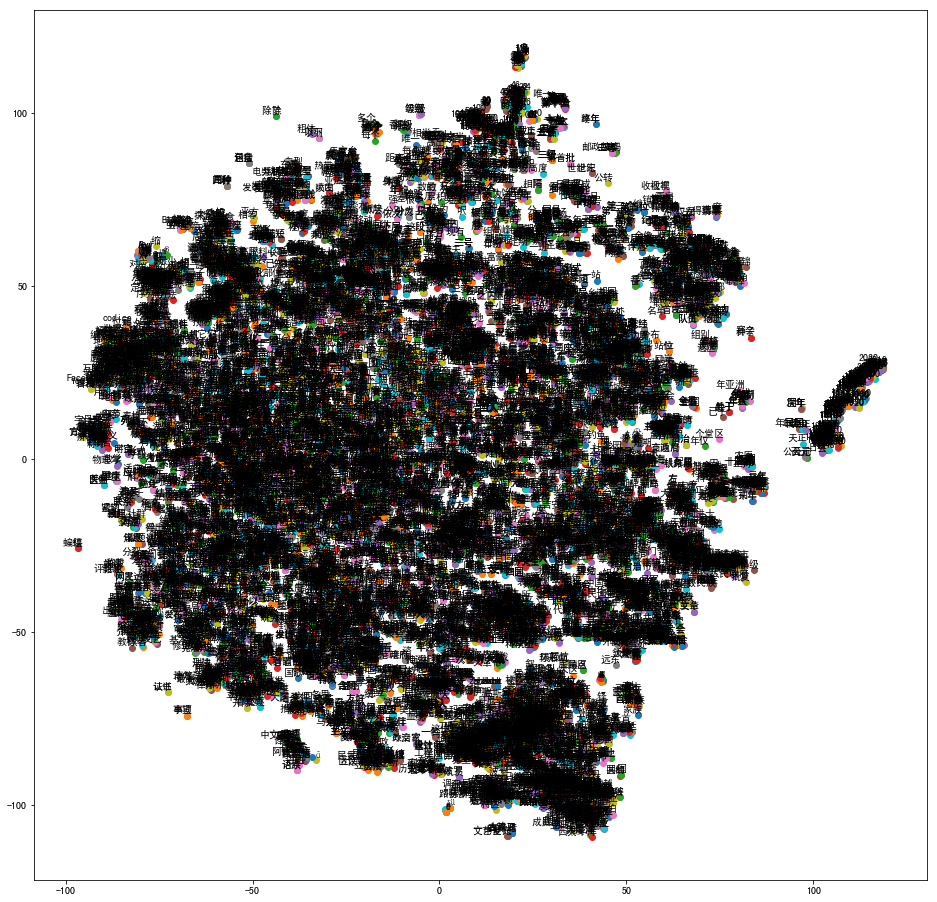

In [20]:
tsne_plot(model)